**Part 1**

In [1]:
import requests
import folium
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display

In [2]:
def fetch_buienradar_data():
    try:
        return requests.get("https://data.buienradar.nl/2.0/feed/json").json()
    except Exception as e:
        print("Error fetching data:", e)
        return {}

In [3]:
data = fetch_buienradar_data()
print("Top-level keys:", list(data.keys()))

Top-level keys: ['$id', 'buienradar', 'actual', 'forecast']


In [4]:
actual_data = data.get('actual', {})
print("Keys in 'actual':", list(actual_data.keys()))

Keys in 'actual': ['$id', 'actualradarurl', 'sunrise', 'sunset', 'stationmeasurements']


In [5]:
station_measurements = actual_data.get('stationmeasurements', [])

In [6]:
measurements_data = []
for idx, m in enumerate(station_measurements, start=1):
    measurements_data.append({
        'measurementid': idx,                     
        'timestamp': m.get('timestamp'),
        'temperature': m.get('temperature'),
        'groundtemperature': m.get('groundtemperature'),
        'feeltemperature': m.get('feeltemperature'),
        'windgusts': m.get('windgusts'),
        'windspeedBft': m.get('windspeedBft'),
        'humidity': m.get('humidity'),
        'precipitation': m.get('precipitation'),
        'sunpower': m.get('sunpower'),
        'stationid': m.get('stationid')
    })

df_measurements = pd.DataFrame(measurements_data)
df_measurements.head(4)

,measurementid,timestamp,temperature,groundtemperature,feeltemperature,windgusts,windspeedBft,humidity,precipitation,sunpower,stationid
0,1,2025-02-09T15:10:00,4.9,5.1,3.3,3.3,2.0,78.0,0.0,72.0,6391
1,2,2025-02-09T15:10:00,5.4,5.9,2.5,6.3,3.0,72.0,0.0,134.0,6275
2,3,2025-02-09T15:10:00,5.3,5.0,1.6,7.0,3.0,78.0,0.0,74.0,6249
3,4,2025-02-09T15:10:00,5.4,5.4,2.7,5.6,2.0,75.0,0.0,120.0,6260


In [7]:
station_data = []
for s in station_measurements:
    station_data.append({
        'stationid': s.get('stationid'),
        'stationname': s.get('stationname'),
        'lat': s.get('lat'),
        'lon': s.get('lon'),
        'regio': s.get('regio'),
    })
df_stations = pd.DataFrame(station_data)
df_stations.head(4)

,stationid,stationname,lat,lon,regio
0,6391,Meetstation Arcen,51.50,6.20,Venlo
1,6275,Meetstation Arnhem,52.07,5.88,Arnhem
2,6249,Meetstation Berkhout,52.65,4.98,Berkhout
3,6260,Meetstation De Bilt,52.10,5.18,Utrecht


In [8]:
df_measurements.to_csv("Data/df_measurements.csv", index=False)
df_stations.to_csv("Data/df_stations.csv", index=False)

**Part 2**

In [9]:
df_merged = pd.merge(df_measurements, df_stations, on='stationid', how='left')
df_merged.head(4)

,measurementid,timestamp,temperature,groundtemperature,feeltemperature,windgusts,windspeedBft,humidity,precipitation,sunpower,stationid,stationname,lat,lon,regio
0,1,2025-02-09T15:10:00,4.9,5.1,3.3,3.3,2.0,78.0,0.0,72.0,6391,Meetstation Arcen,51.50,6.20,Venlo
1,2,2025-02-09T15:10:00,5.4,5.9,2.5,6.3,3.0,72.0,0.0,134.0,6275,Meetstation Arnhem,52.07,5.88,Arnhem
2,3,2025-02-09T15:10:00,5.3,5.0,1.6,7.0,3.0,78.0,0.0,74.0,6249,Meetstation Berkhout,52.65,4.98,Berkhout
3,4,2025-02-09T15:10:00,5.4,5.4,2.7,5.6,2.0,75.0,0.0,120.0,6260,Meetstation De Bilt,52.10,5.18,Utrecht


In [10]:
max_index = df_merged['temperature'].idxmax()
max_station = df_merged.loc[max_index, 'stationname']
print("The station with the highest temperature is:", max_station)

The station with the highest temperature is: Meetstation Goes


In [11]:
avg_temp = df_merged['temperature'].mean()
print(f"The average temperature: {avg_temp:.1f}")

The average temperature: 5.4


In [12]:
df_merged["temp_diff_feel_actual"] = np.abs(df_merged['feeltemperature'] - df_merged['temperature'])
max_index_temp = df_merged['temp_diff_feel_actual'].idxmax()
max_station_temp = df_merged.loc[max_index_temp, 'stationname']
print("Station with max temp diff (feel vs actual):", max_station_temp)
print("Absolute temp diff:", df_merged.loc[max_index_temp, 'temp_diff_feel_actual'])

Station with max temp diff (feel vs actual): Meetstation Lauwersoog
Absolute temp diff: 5.6000000000000005


In [13]:
north_sea_station = df_merged[df_merged['regio'] == 'Noordzee']
print("The weather station(s) is located in the North Sea is:", north_sea_station['stationname'].tolist())

The weather station(s) is located in the North Sea is: ['Meetstation Zeeplatform F-3']


**Part 3A**

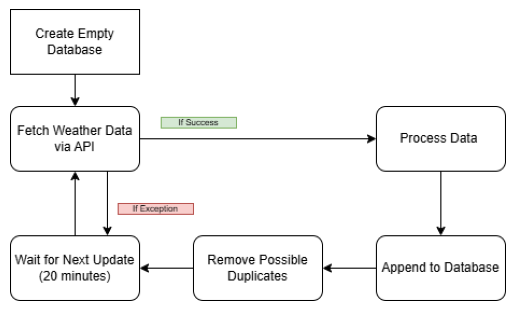

In [14]:
img = mpimg.imread("Zypp.drawio.png")
plt.imshow(img)
plt.axis("off")  
plt.show()

In [18]:
def get_buienradar_dataframe():
    data = fetch_buienradar_data()
    station_measurements = data.get('actual', {}).get('stationmeasurements', [])
    combined_data = []
    for idx, m in enumerate(station_measurements, start=1):
        combined_data.append({
            'measurementid': idx,
            'timestamp': m.get('timestamp'),
            'temperature': m.get('temperature'),
            'groundtemperature': m.get('groundtemperature'),
            'feeltemperature': m.get('feeltemperature'),
            'windgusts': m.get('windgusts'),
            'windspeedBft': m.get('windspeedBft'),
            'humidity': m.get('humidity'),
            'precipitation': m.get('precipitation'),
            'sunpower': m.get('sunpower'),
            'stationid': m.get('stationid'),
            'stationname': m.get('stationname'),
            'lat': m.get('lat'),
            'lon': m.get('lon'),
            'regio': m.get('regio')
        })
    return pd.DataFrame(combined_data)

#In production, remove the count, it should be while True
def automate_data_population(interval):
    combined_df = pd.DataFrame()
    count = 0
    while count < 3:
        try:
            df = get_buienradar_dataframe()
        except Exception as e:
            print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                  ": Error fetching data -", e)
            time.sleep(interval)
            count += 1
            continue
        print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
              ": Retrieved", len(df), "rows")
        combined_df = pd.concat([combined_df, df], ignore_index=True)
        combined_df = combined_df.drop_duplicates()
        time.sleep(interval)
        count += 1
    return combined_df

final_df = automate_data_population(5)

2025-02-09 15:30:36 : Retrieved 39 rows
2025-02-09 15:30:41 : Retrieved 39 rows
2025-02-09 15:30:46 : Retrieved 39 rows


**Part 3.B**

In [19]:
m = folium.Map(location=[52.0, 5.0], zoom_start=7)
for _, row in df_merged.iterrows():
    popup_text = f"{row['stationname']}, Temp: {row['temperature']}, dT: {row['temp_diff_feel_actual']:.1f}"
    folium.Marker([row['lat'], row['lon']], popup=popup_text).add_to(m)

In [17]:
display(m)